<a href="https://colab.research.google.com/github/Angron04/AI_Spring2025/blob/main/FrozenLake_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt


In [8]:

# Initialize FrozenLake environment
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True, render_mode=None)
n_actions = env.action_space.n
n_states = env.observation_space.n


In [9]:
n_actions = env.action_space.n
n_states = env.observation_space.n


In [ ]:
def print_frozen_lake_layout(env):
    desc = env.unwrapped.desc.astype(str)
    size = desc.shape[0]

    for i in range(size):
        row = ""
        for j in range(size):
            cell = f" {desc[i][j]} "
            row += f"|{cell}"
        row += "|"
        print(row)
        print("-" * len(row))
print_frozen_lake_layout(env)

| S | F | F | F |
-----------------
| F | H | F | H |
-----------------
| F | F | F | H |
-----------------
| H | F | F | G |
-----------------


In [ ]:
alpha = 0.1
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.9995
epsilon_min = 0.05
num_episodes = 10000


In [18]:
epsilon = 1.0
epsilon_min = 0.05
epsilon_decay = 0.9995
alpha = 0.1
gamma = 0.95


In [19]:
# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Store rewards per episode
rewards_per_episode_Q = []

# Q-learning loop
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        next_state, reward, done, truncated, _ = env.step(action)

        # Update Q-value
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))

        state = next_state
        total_reward += reward

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode_Q.append(total_reward)

    if (episode + 1) % 500 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Epsilon: {epsilon:.4f}, Avg Reward: {np.mean(rewards_per_episode_Q[-100:]):.2f}")


Episode 500/10000, Epsilon: 0.7788, Avg Reward: 0.01
Episode 1000/10000, Epsilon: 0.6065, Avg Reward: 0.05
Episode 1500/10000, Epsilon: 0.4723, Avg Reward: 0.06
Episode 2000/10000, Epsilon: 0.3678, Avg Reward: 0.12
Episode 2500/10000, Epsilon: 0.2864, Avg Reward: 0.13
Episode 3000/10000, Epsilon: 0.2230, Avg Reward: 0.15
Episode 3500/10000, Epsilon: 0.1737, Avg Reward: 0.37
Episode 4000/10000, Epsilon: 0.1353, Avg Reward: 0.32
Episode 4500/10000, Epsilon: 0.1053, Avg Reward: 0.33
Episode 5000/10000, Epsilon: 0.0820, Avg Reward: 0.43
Episode 5500/10000, Epsilon: 0.0639, Avg Reward: 0.45
Episode 6000/10000, Epsilon: 0.0500, Avg Reward: 0.38
Episode 6500/10000, Epsilon: 0.0500, Avg Reward: 0.37
Episode 7000/10000, Epsilon: 0.0500, Avg Reward: 0.55
Episode 7500/10000, Epsilon: 0.0500, Avg Reward: 0.37
Episode 8000/10000, Epsilon: 0.0500, Avg Reward: 0.54
Episode 8500/10000, Epsilon: 0.0500, Avg Reward: 0.41
Episode 9000/10000, Epsilon: 0.0500, Avg Reward: 0.35
Episode 9500/10000, Epsilon: 

In [13]:
n_actions = env.action_space.n
n_states = env.observation_space.n
num_episodes = 10000
alpha = 0.1
gamma = 0.95
epsilon_min = 0.05
epsilon_decay = 0.9995


In [14]:
# SARSA Implementation
Q_sarsa = np.zeros((n_states, n_actions))
rewards_per_episode_SARSA = []

epsilon_sarsa = 1.0  # reset epsilon for SARSA

for episode in range(num_episodes):
    state = env.reset()[0]
    done = False

    # Select initial action using epsilon-greedy
    if np.random.rand() < epsilon_sarsa:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q_sarsa[state])

    total_reward = 0

    while not done:
        next_state, reward, done, truncated, _ = env.step(action)

        if np.random.rand() < epsilon_sarsa:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q_sarsa[next_state])

        # SARSA update rule
        Q_sarsa[state, action] = (1 - alpha) * Q_sarsa[state, action] + \
                                 alpha * (reward + gamma * Q_sarsa[next_state, next_action])

        state = next_state
        action = next_action
        total_reward += reward

    rewards_per_episode_SARSA.append(total_reward)

    # Decay epsilon
    epsilon_sarsa = max(epsilon_min, epsilon_sarsa * epsilon_decay)


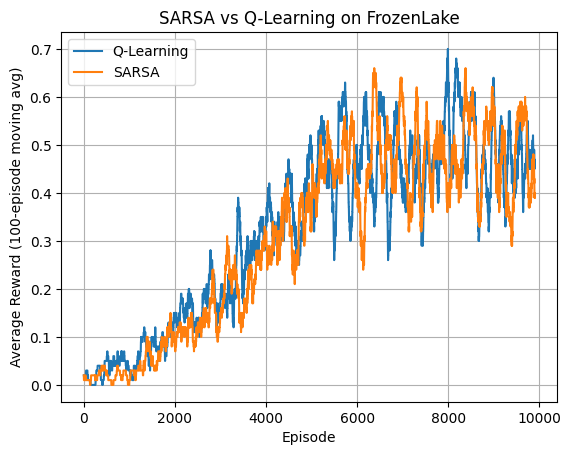

In [20]:
plt.plot(np.convolve(rewards_per_episode_Q , np.ones(100)/100, mode='valid'), label='Q-Learning')
plt.plot(np.convolve(rewards_per_episode_SARSA, np.ones(100)/100, mode='valid'), label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Average Reward (100-episode moving avg)')
plt.title('SARSA vs Q-Learning on FrozenLake')
plt.legend()
plt.grid()
plt.show()


In [22]:
def evaluate_policy(env, Q, episodes=100):
    success_count = 0
    for _ in range(episodes):
        state = env.reset()[0]
        done = False
        while not done:
            action = np.argmax(Q[state])
            state, reward, done, _, _ = env.step(action)
            if reward == 1:
                success_count += 1
    return success_count / episodes

# Evaluate both policies
success_rate_q = evaluate_policy(env, Q, episodes=100)
success_rate_sarsa = evaluate_policy(env, Q_sarsa, episodes=100)

print(f"Q-Learning Success Rate: {success_rate_q * 100:.2f}%")
print(f"SARSA Success Rate: {success_rate_sarsa * 100:.2f}%")


Q-Learning Success Rate: 79.00%
SARSA Success Rate: 72.00%


In [23]:
actions = ['←', '↓', '→', '↑']

def print_policy(Q, env):
    policy = [actions[np.argmax(Q[s])] for s in range(env.observation_space.n)]
    for i in range(0, len(policy), 4):
        print(policy[i:i+4])

print("Q-Learning Greedy Policy:")
print_policy(Q, env)

print("\nSARSA Greedy Policy:")
print_policy(Q_sarsa, env)


Q-Learning Greedy Policy:
['←', '↑', '←', '↑']
['←', '←', '←', '←']
['↑', '↓', '←', '←']
['←', '→', '↓', '←']

SARSA Greedy Policy:
['←', '↑', '↓', '↑']
['←', '←', '→', '←']
['↑', '↓', '←', '←']
['←', '→', '↓', '←']


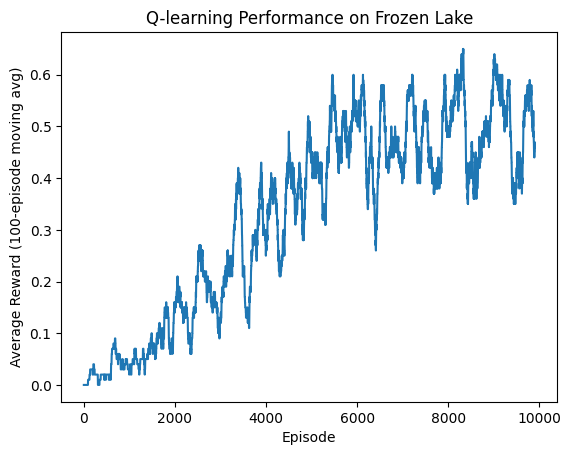

Learned Q-table:
[[0.20723313 0.1618406  0.16331294 0.16295708]
 [0.0908955  0.0848774  0.07364385 0.14925607]
 [0.13717272 0.10691451 0.10823151 0.10605231]
 [0.08958018 0.07479608 0.06944829 0.09593588]
 [0.24302801 0.14416089 0.13282385 0.10826387]
 [0.         0.         0.         0.        ]
 [0.15475099 0.06689209 0.09277409 0.0572576 ]
 [0.         0.         0.         0.        ]
 [0.16231846 0.23435821 0.15993199 0.30367794]
 [0.25726613 0.37701737 0.30236317 0.25613382]
 [0.43969728 0.28203445 0.21037513 0.21482582]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.33023615 0.34479928 0.42625313 0.27152771]
 [0.54425646 0.66931029 0.5670249  0.5213447 ]
 [0.         0.         0.         0.        ]]



Optimal state values from Value Iteration:
[0.18046404 0.15475089 0.15347326 0.13254421 0.20896091 0.
 0.17642894 0.         0.27045289 0.37464883 0.40367096 0.
 0.         0.50897814 0.72367275 0.        ]
State | Max Q-Value 

In [ ]:
# Plot learning curve
plt.plot(np.convolve(rewards_per_episode_Q, np.ones(100)/100, mode='valid'))
plt.xlabel("Episode")
plt.ylabel("Average Reward (100-episode moving avg)")
plt.title("Q-learning Performance on Frozen Lake")
plt.show()

# Display learned Q-table
print("Learned Q-table:")
print(Q)

# Value Iteration to find optimal utilities
V = np.zeros(n_states)
threshold = 1e-6
delta = float("inf")
env_unwrapped = env.unwrapped  # Get the raw environment

while delta > threshold:
    delta = 0
    for state in range(n_states):
        v = V[state]
        V[state] = max(sum(prob * (reward + gamma * V[next_state])
                          for prob, next_state, reward, _ in env_unwrapped.P[state][action])
                       for action in range(n_actions))
        delta = max(delta, abs(v - V[state]))

# Display optimal utility values
print("\n\n\nOptimal state values from Value Iteration:")
print(V)

# Compare max Q-values to optimal state values
print("State | Max Q-Value | Optimal V-Value | Difference")
print("---------------------------------------------------")
for state in range(n_states):
    max_q = np.max(Q[state, :])
    optimal_v = V[state]
    diff = abs(max_q - optimal_v)
    print(f"{state:5} | {max_q:10.4f} | {optimal_v:10.4f} | {diff:10.4f}")


In [ ]:
# Extract  policy from Q-table
policy_Q = np.argmax(Q, axis=1)

# Convert to grid shape for FrozenLake (4×4)
policy_grid = policy_Q.reshape(env.unwrapped.desc.shape)

# Map action indices to arrow symbols for readability
action_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
policy_symbols = np.vectorize(action_map.get)(policy_grid)

print("Extracted Q-Learning Policy (←, ↓, →, ↑):")
for row in policy_symbols:
    print(' '.join(row))

print(f"policy_Q: {policy_Q}")

Extracted Q-Learning Policy (←, ↓, →, ↑):
← ↑ ← ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←
policy_Q: [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]



Average reward per episode using the optimal policy: 0.7726
Average number of steps per episode: 43.46


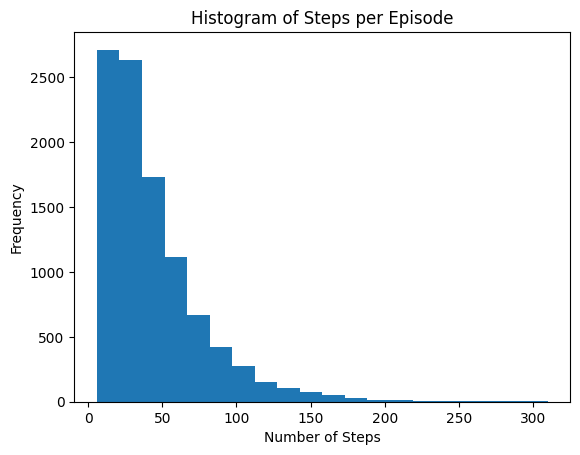

In [ ]:
# Simulate average reward per episode using the optimal policy
# In the simulation of average reward, keep track of the number of steps per episode, and make a histogram of the number of steps.

num_simulations = 10000
total_rewards = []
steps_per_episode = []  # Keep track of steps per episode

for _ in range(num_simulations):
    state, _ = env.reset()
    total_reward = 0
    done = False
    steps = 0

    while not done:
        action = policy_Q[state]  # Use the extracted policy
        next_state, reward, done, truncated, _ = env.step(action)
        state = next_state
        total_reward += reward
        steps += 1

    total_rewards.append(total_reward)
    steps_per_episode.append(steps)

average_reward = np.mean(total_rewards)
average_steps = np.mean(steps_per_episode)  # Calculate average steps
print(f"\nAverage reward per episode using the optimal policy: {average_reward:.4f}")
print(f"Average number of steps per episode: {average_steps:.2f}")

# Histogram of number of steps per episode
plt.hist(steps_per_episode, bins=20)
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.title("Histogram of Steps per Episode")
plt.show()


In this project, we compared Q-Learning and SARSA using the FrozenLake environment and saw some clear differences in how they learn and behave. Q-Learning is off-policy, so it learns based on the best possible action, which made it more aggressive and faster to find what it thinks is the optimal path. This often led to more direct, riskier routes across the lake. SARSA, on the other hand, is on-policy and updates based on the actual action taken, so it ended up being more cautious. It learned safer paths that avoided risky tiles, even if those paths were longer. When we tested the greedy policies after training, SARSA actually reached the goal more often, which shows it was more consistent and reliable. Q-Learning had some spikes in performance and learned faster, but it could also make poor choices in dangerous spots. When looking at the policies visually, Q-Learning usually took straighter routes, while SARSA's policy curved around the risky areas. Overall, Q-Learning is good if you want speed and high rewards in a more predictable environment, but SARSA is better when you need a safer, more stable policy.
